<a href="https://colab.research.google.com/github/elizamelo/Analise-Dados-FAE/blob/main/2024_01/RooFit/ROOTnoColab_Aula04Data2024_01_ExemplosPULL5bMLE_Corrigir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://colab.research.google.com/drive/1XlUrz2_dcKnsbHfTUvY8a8RATATr9XBX#scrollTo=0sRCsFc7JClS
!wget https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
!unzip /content/root_v6.28.04_Ubuntu_20.04.zip
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
!apt-get inatall libpython3.6-dev
!rm -f root_v6.28.04_Ubuntu_20.04.zip

Streaming output truncated to the last 5000 lines.
  inflating: root_build/tutorials/gui/calendar.C  
  inflating: root_build/tutorials/gui/mditest.C  
  inflating: root_build/tutorials/gui/Slider3Demo.C  
  inflating: root_build/tutorials/gui/mditestbg.xpm  
  inflating: root_build/tutorials/gui/textEntries.C  
  inflating: root_build/tutorials/gui/ntupleTableTest.C  
  inflating: root_build/tutorials/gui/customContextMenu.C  
  inflating: root_build/tutorials/gui/splitterHorizontal.C  
  inflating: root_build/tutorials/gui/guiWithCINT.C  
  inflating: root_build/tutorials/gui/CPUMeter.C  
  inflating: root_build/tutorials/gui/numberEntry.C  
  inflating: root_build/tutorials/gui/splitbuttonTest.C  
  inflating: root_build/tutorials/gui/buttonTest.C  
  inflating: root_build/tutorials/gui/simpleTableTest.C  
  inflating: root_build/tutorials/gui/drag_and_drop.C  
  inflating: root_build/tutorials/gui/textviewostream.C  
  inflating: root_build/tutorials/gui/listBox.C  
  inflating: ro

In [2]:
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!rm -f libssl1.1_1.1.1f-1ubuntu2_amd64.deb

--2024-04-11 19:44:21--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 91.189.91.83, 185.125.190.39, 185.125.190.36, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|91.189.91.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318204 (1.3M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  7.95MB/s    in 0.2s    

2024-04-11 19:44:22 (7.95 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’ saved [1318204/1318204]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 121902 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog

In [3]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')

<CDLL '/content/root_build/lib//libTreePlayer.so', handle 58feee08e100 at 0x78198d4460b0>

In [4]:
#Block to import all the ROOT functions that we will be using throughout this template
# Importamos as classes necessárias
from ROOT import TFile
from ROOT import TLorentzVector
from ROOT import TH1F, TH1D
from ROOT import TF1
import numpy as np
from ROOT import RooRealVar, RooGenericPdf
from ROOT import RooDataHist
from ROOT import RooDataSet
from ROOT import RooExponential
from ROOT import RooGaussian
from ROOT import RooVoigtian
from ROOT import RooArgList
from ROOT import RooArgSet
from ROOT import RooAddPdf
from ROOT import RooPlot
from ROOT import TLegend
from ROOT import RooFit
from ROOT import TLatex
from ROOT import RooChi2Var
from ROOT import TStyle
from ROOT import TCanvas, TFile, TPaveText, TH1F, TLegend, TTree
from ROOT import gStyle, TGraphErrors, TF1, TGraph, gPad, gRandom, gROOT
from ROOT import kRed, kBlue
from ROOT import TFitResultPtr, TMatrixD



Welcome to JupyROOT 6.28/04


**Exemplo 05:** Toy generation, fitting and visualization

Ref.:https://indico.fnal.gov/event/23628/contributions/240488/attachments/155046/201823/Teaching%20RooFit.pdf



Passos:


*   uma pdf com um sinal e uma componente de fundo
*   número esperado de eventos considerados da likelihood (ajuste estendido)
*   construção de modelos, geração de brinquedos, montagem e plotagem
*   mesmo que o conjunto de dados esteja binado no gráfico, o o ajuste está unbinned





[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (signal,background)
 **********
 **   73 **SET PRINT           1
 **********
 **********
 **   74 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 bkgc        -3.00000e-01  2.00000e-01   -1.00000e+01  1.00000e-01
     2 nbkg         6.00000e+02  3.00000e+02    0.00000e+00  1.00000e+04
     3 nsig         2.00000e+02  1.00000e+02    0.00000e+00  1.00000e+04
     4 sigmean      5.00000e+00  1.00000e+00    0.00000e+00  1.00000e+01
     5 sigwidth     1.00000e+00  4.95000e-01    1.00000e-02  1.00000e+01
 **********
 **   75 **SET ERR         0.5
 **********
 **********
 **   76 **SET PRINT           1
 **********
 **********
 **   77 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 *********

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


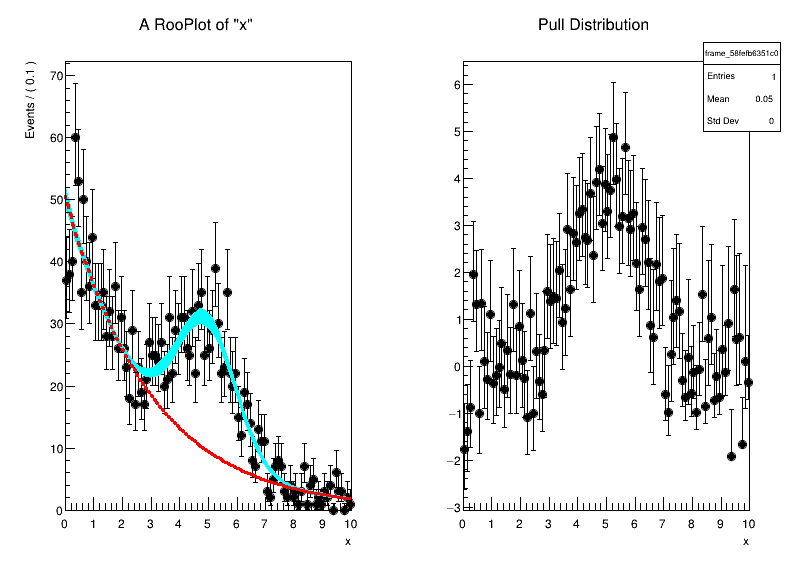

In [13]:
# Observable and parameters
x = RooRealVar("x", "x", 0.0, 10.0)
sigmean = RooRealVar("sigmean", "sigmean", 5.0, 0.0, 10.0)
sigwidth = RooRealVar("sigwidth", "sigwidth", 1.0, 0.01, 10.0)
bkgc = RooRealVar("bkgc", "bkgc", -0.3, -10.0, 0.1)

# Build a Gaussian pdf and exponential background pdf:
signal = RooGaussian("signal", "signal", x, sigmean, sigwidth)
background = RooExponential("background", "background", x, bkgc)

# Create RooRealVar object
#fraction = RooRealVar("fraction", "fraction of Gaussian", 0.5, 0.0, 1.0)

# Construct the added pdf with expected nr. of events for extended fit:
nsig = RooRealVar("nsig", "nsig", 200, 0.0, 10000.0)
nbkg = RooRealVar("nbkg", "nbkg", 600, 0.0, 10000.0)

model = RooAddPdf("model", "model", RooArgList(signal, background),RooArgList(nsig, nbkg))

#model = RooAddPdf("model", "model", RooArgList(signal, background), RooArgList(fraction))


# Generate a toy MC sample from composite PDF:
data = model.generate(RooArgSet(x), 2000)

# Perform ML fit of composite PDF to toy data:
#result = model.fitTo(data, RooFit.Save())
result = model.fitTo(data, RooFit.Extended(True), RooFit.Save())




# Plot toy data and composite PDF overlaid:
xframe = x.frame()
data.plotOn(xframe)
model.plotOn(xframe,RooFit.VisualizeError(result))
model.plotOn(xframe, RooFit.Components(background), RooFit.LineStyle(2),RooFit.LineColor(kRed))
# Create a frame to draw the pull distribution and add the distribution to
# the frame
hpull = xframe.pullHist()
frame3 = x.frame(Title="Pull Distribution")
frame3.addPlotable(hpull, "P")
xframe.Draw()
frame3.Draw()


# Create and draw canvas
canvas = TCanvas("canvas", "canvas", 800, 600)
canvas.Divide(2)

canvas.cd(1)
gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.6)
xframe.Draw()
canvas.Draw()

canvas.cd(2)
gPad.SetLeftMargin(0.15)
frame3.GetYaxis().SetTitleOffset(1.6)

# Adiciona estatísticas ao frame
frame3.SetStats(1)

frame3.Draw()
canvas.Draw()

# Print fit result
result.Print()